In [4]:
"""Car:
    *noun* = variables
    ideal cruzing speed
    % break chance
    rate accelerate
    current speed
    
    *verb* = functions
    accelerate
    decelerate
    car in front
    
    *collaborator*
    road
    car in front
    """

colour_list = ["red", "white", "blue"]

In [5]:
import random
import numpy as np
import matplotlib.pyplot as plt

class Car():
    
    def __init__(self, max_kph = 120, current_speed = 0, car_length = 5,
                start_location = 0, in_front = None, course_length = 1000):
        self.max_kph = max_kph
        self.current_speed = current_speed
        self.car_length = car_length
        self.location = start_location
        self.in_front = in_front
        self.course_length = course_length
    
    @property
    def move_forward(self):
        self.change_velocity()
        self.location += self.current_speed
        if self.location > self.course_length:
            self.location = self.course_length % 1000
    
    @property
    def translate_max(self):
        return self.max_kph / 3.6
    
    def accelerate(self):
        if self.current_speed < self.translate_max:
            self.current_speed += 2
    
    def can_decelerate(self):
        if random.random() <= .1:
            return True
        return False
    
    def decelerate(self):
        if self.current_speed > 0:
            self.current_speed -= 2
        
    def change_velocity(self):
        if self.distance_check():
            self.keep_distance()
        if self.can_decelerate():
            self.decelerate()
        else:
            self.accelerate()
            
    def distance_check(self):
        if self.in_front.location <= self.location + self.current_speed + 6:
            return True
        return False
            
    def keep_distance(self):
        self.current_speed = self.in_front.current_speed

In [6]:
class Road():
    
    def __init__(self, road_length = 1000):
        self.road_length = road_length

In [72]:
class Simulation:
    
    def __init__(self, num_cars = 30, length = 1000):
        self.num_cars = num_cars
        self.length = length
        self.cars = self.create_cars()
    
    def create_cars(self):
        cars = []
        locations = np.linspace(0, self.length - 33, self.num_cars)[::-1]
        old_car = None
        for num in range(self.num_cars):
            new_car = Car(start_location = locations[num],
                          in_front = old_car)
            cars.append(new_car)
            old_car = new_car
            cars[0].in_front = cars[-1]
        return cars
    
    def run_simulation(self, times = 60):
        for _ in range(times):
            self.simulate()
        return [self.report]
    
    def simulate(self):
        for car in self.cars:
            car.move_forward
    
    @property
    def report(self):
        return [car.location for car in self.cars][::-1]
    
    def scatter(self, rounds = 60):
        x = []
        y = []
        x.append(self.run_simulation(times = rounds))
        y.append([rounds] * self.num_cars)
        return plt.scatter(x, y)

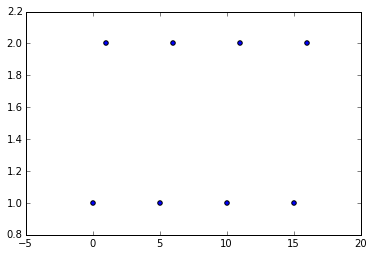

In [45]:
plt.scatter([[0, 5, 10, 15], [1, 6, 11, 16]],
            [[1, 1, 1, 1],[2, 2, 2, 2]])
timeslaces = [[x] * 10 for x in range (120)]

In [46]:
% matplotlib inline

In [73]:
sim = Simulation(num_cars = 5)

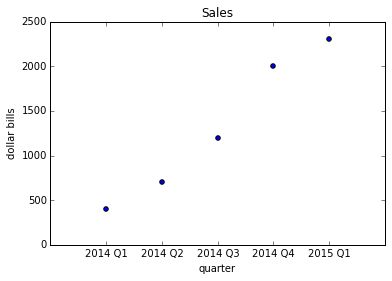

In [48]:
x1 = ["2014 Q1", "2014 Q2", "2014 Q3", "2014 Q4", "2015 Q1"]
y1 = [400, 700, 1200, 2000, 2300]
plt.scatter(range(5), y1)
plt.xticks(range(5), x1)
plt.xlabel("quarter")
plt.ylabel("dollar bills")
plt.title("Sales")
plt.show()

In [49]:
print(sim.report)

[0.0, 241.75, 483.5, 725.25, 967.0]


In [75]:
print(sim.run_simulation(times = 2))

[[778, 0, 238, 474, 710]]


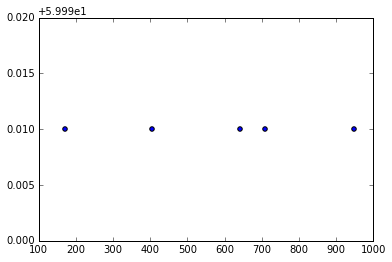

In [74]:
print(sim.scatter())